## Deep Learning with PyTorch : Neural Style Transfer

![picture](https://drive.google.com/uc?export=view&id=1tUTSOEaT9v2CaNiA75EdBAzAFW4heW9K)


## Task 1 : Set Google Colab runtime

In [ ]:
!pip install torch torchvision

In [ ]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


## Task 2 : Loading VGG Pretrained Model

In [ ]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
# removing classifier part of vgg19

vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
# freezing the model; no gradient computation will occur
for parameters in vgg.parameters():
  parameters.requires_grad_(False) # no update on weight and bias

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [ ]:
from PIL import Image
from torchvision import transforms as T

def preprocess(img_path, max_size = 500):
  img = Image.open(img_path).convert('RGB')
  if max(img.size) > max_size:
    size = max_size
  else:
    size = max(img.size)

  img_transforms = T.Compose([ T.Resize(size), T.ToTensor(), 
                              T.Normalize(mean = [0.485, 0.456, 0.406], # standard for pretrained models
                                          std = [0.229, 0.224, 0.225])
                            ])
  img = img_transforms(img)
  img = img.unsqueeze(0) # (3, 224, 224) -> (1, 3, 224, 224)

  return img


In [ ]:
content_p = preprocess('content11.jpg')
style_p = preprocess('style12.jpg')

content_p = content_p.to(device)
style_p = style_p.to(device)

print(content_p.shape, style_p.shape)

torch.Size([1, 3, 259, 345]) torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [ ]:
# Opposite function of Preprocess
import numpy as np
import matplotlib.pyplot as plt

def deprocess(tensor):
  img = tensor.to('cpu').clone()
  img = img.numpy()
  img = img.squeeze(0) # (1, 3, 224, 224) -> (3, 224, 224)
  img = img.transpose(1,2,0) #(3, 224, 224) -> (224, 224, 3)
  img = img * np.array([0.229, 0.224, 0.225]) + np.mean([0.485, 0.456, 0.406])
  img = img.clip(0, 1)

  return img


In [ ]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)
content_d.shape, style_d.shape

((259, 345, 3), (625, 500, 3))

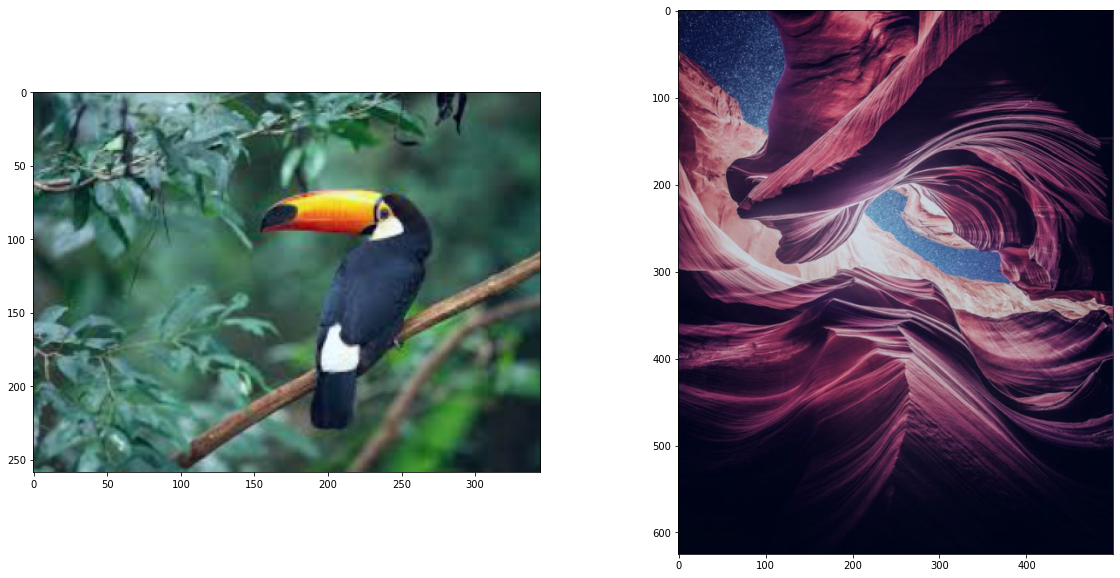

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (20, 10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [ ]:
def get_features(img, model):
  layers = {
      '0' : 'conv1_1',
      '5':  'conv2_1',
      '10': 'conv3_1',
      '19': 'conv4_1',
      '21': 'conv4_2', # content feature extractor
      '28': 'conv5_1', 
  }

  Features = {}
  x = img
  for name, layer in model._modules.items():
    # print(name, layer)
    # x = layer(x)
    if name in layers:
      x = layer(x)
      Features[layers[name]] = x
  return Features

In [ ]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)


In [ ]:
content_f.keys()
# vgg._modules.items()

dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1'])

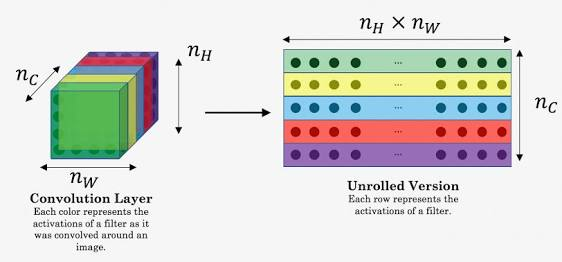

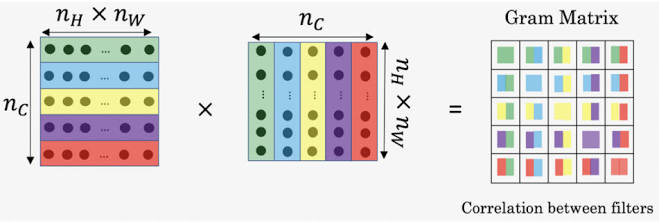

In [ ]:
def gram_matrix(tensor):
  b, c, h, w = tensor.size()
  tensor = tensor.view(c, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [ ]:
style_grams = {layer: gram_matrix(style_f[layer]) for layer in style_f}

In [ ]:
style_grams.keys()

dict_keys(['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv4_2', 'conv5_1'])

## Task 6 : Creating Style and Content loss function

In [ ]:
def content_loss(target_conv4_2, content_conv4_2):
  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [ ]:
style_weights = {
    'conv1_1': 1.0,
    'conv2_1': 0.75,
    'conv3_1': 0.75,
    'conv4_1': 0.2,
    'conv5_1': 0.2
}

In [ ]:
def style_loss(style_weights, target_ft, style_grams):
  loss = 0
  for layer in style_weights:
    target_f = target_ft[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layers_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layers_loss / (c*h*w)

  return loss


In [ ]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print('content loss: ', content_loss(target_f['conv4_2'], content_f['conv4_2']))
print('style loss: ', style_loss(style_weights, target_f, style_grams))


content loss:  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
style loss:  tensor(7.2229e+09, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [ ]:
from torch import optim

optimizer = optim.Adam([target], lr = 0.003)

alpha = 1
beta = 1e5
epochs = 3000
show_every = 500


In [ ]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [ ]:
# target_f.keys()
type(target_f)

dict

In [ ]:
content_loss(target_f['conv4_2'], content_f['conv4_2'])

tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)
  c_loss = content_loss(target_f['conv4_2'], content_f['conv4_2'])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward() # updating pixel values
  optimizer.step()

  if i % show_every == 0:
    print('Total loss at Epoch: {} : {}'.format(i, t_loss))
    results.append(deprocess(target.detach()))

Total loss at Epoch: 0 : 722290354421760.0
Total loss at Epoch: 500 : 42568079376384.0
Total loss at Epoch: 1000 : 26484261519360.0
Total loss at Epoch: 1500 : 18793820585984.0
Total loss at Epoch: 2000 : 13503799754752.0
Total loss at Epoch: 2500 : 10088535293952.0


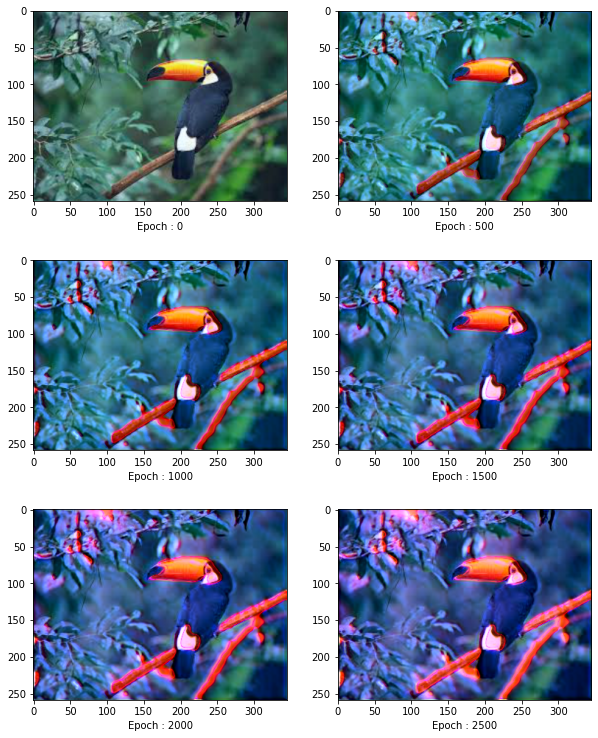

In [ ]:
plt.figure(figsize = (10, 13))

for i in range(len(results)):
  plt.subplot(3, 2, i+1)
  plt.imshow(results[i])
  plt.xlabel("Epoch : {}".format(show_every*(i)))
  
plt.show()

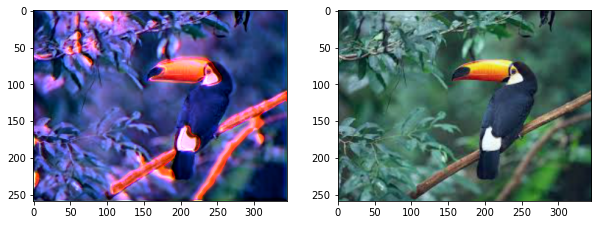

In [ ]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.imshow(target_copy)
# ax1.xlabel('Generated Image')
ax2.imshow(content_copy)
# ax2.xlabel('Content Image')
